# Esame 04-04-2023 (Calcolo Numerico 21/22)

### Gabriel Cellammare
### Mat: 735118
#### Email: g.cellammare1@studenti.uniba.it


# Esercizio 1

Data la seguente matrice A:
$$
A = \left[\begin{array}{ccc}
1/2&1/12&0&0\\
1/2&1/12&1/3&0\\
0&1/2&1/3&1/2\\
0&0&1/12&1/2\\
\end{array}\right]
$$


### 1.1

#### Calcolare la fattorizzazione LU con pivot totale di A tale che PAQ = LU.

In [3]:
#Eseguo i vari import

import numpy as np
import sympy as sy
import scipy.linalg as la
from scipy.linalg import hilbert

#Inizializzo la matrice
A = np.array([[1/2,1/12,0,0],[1/2,1/12,1/3,0],[0,1/2,1/3,1/2],[0,0,1/12,1/2]])
print("Matrice A\n",A)


rankA = np.linalg.matrix_rank(A)
print("\nRango della matrice: ", rankA)
print("\nDeterminante della matrice: ", np.linalg.det(A))


Matrice A
 [[0.5        0.08333333 0.         0.        ]
 [0.5        0.08333333 0.33333333 0.        ]
 [0.         0.5        0.33333333 0.5       ]
 [0.         0.         0.08333333 0.5       ]]

Rango della matrice:  4

Determinante della matrice:  -0.041666666666666664


In [4]:
def fattLuTotale(A):
    
            # Sappiamo che per eseguire la 
            # fattorizzazione LU necessito di P e Q 
            # matrici di permutazione e L matrice triangolare inferiore e U 
            # triangolare superiore
            
            permuR= 0 #utilizzate per il calcolo finale del determinante
            permuC = 0
            
            n = A.shape[0]
            
            Q = np.asmatrix(np.eye(n)) #matrice di permutazione 
            #Q di dimensione n
            P = np.asmatrix(np.eye(n)) #matrice di permutazione P di dimensione n
            L = np.asmatrix(np.zeros([n,n])) #inizializzo una matrice vuota di dimensione n

            A0 = np.asmatrix(np.copy(A)) #copia di A che mi servirà per costruire U

            i = 0
            flag=0; #Utilizzato per casi limite
            
            for i in range (0,n-1):
                
                #Nella fattorizzazione LU con pivot totale scambio sia righe e colonne di A e righe e colonne di P e Q
              
                pivot = np.argmax(np.abs(A0[i:n,i:n])) #Ricerco l'elemento più grande della matrice A

               
                pivot_rig = pivot//(n - i) #Trovo la riga corrispondente
                
               
                
                pivot_col = pivot - (n - i)*pivot_rig #Trovo la colonna corrispondente
                
               
                pivot_rig = pivot_rig + i #Per rientrare nella matrice n*n
                pivot_col = pivot_col + i
   
                #Scambio righe e colonne di A
                   
                   
                A0[[i, pivot_rig],:] = A0[[pivot_rig,i],:]
                A0[:,[i,pivot_col]] = A0[:,[pivot_col,i]]
                
                #print("\n Matrice A0: \n", A0)
                

                #scambio righe di P e colonne di Q
                temp = P
                
                P[ [i, pivot_rig],:] = P[[pivot_rig,i],:]
                
                if i != pivot_rig:
                    permuR += 1  #per determinante
                    
                temp = Q
                
                Q[ :,[i,pivot_col]] = Q[:,[pivot_col,i]]
                
                if i != pivot_col:
                    permuC += 1

                if i >= 1:
                    L[[i, pivot_rig],:]=L[[pivot_rig,i],:] #scambio righe di L à
                    #Maggiore di 1 perchè nella prima iterata costruisco L


                if(A0[i,i]==0): #Potremmo avere errori in caso di matrici mal condizionate
                    flag=1
                    return (flag,L + np.eye(n),A0,P,Q,permuR,permuC)  
             
             
                L[i+1:n,i] = A0[i+1:n,i]/(A0[i,i]) #L21 
                
            
                A0[i+1:n,i+1:n] = A0[i+1:n,i+1:n] - (L[i+1:n,i]*A0[i,i+1:n]) #Di tipo matrix quindi prodotto riga per colonna
                
                #print("\nSottomatrice  risultante:",A0[i+1:n,i+1:n])
                
                
                #print("\n Matrice A0 finale: \n", A0)
                
                A0[i+1:n,i] = 0
                
   

            #Somma gli elementi e restituisce tutto L
            return (flag,L + np.eye(n),A0,P,Q,permuR,permuC)       
   

In [5]:
#Controlliamo che A sia quadrata e che sia non singolare (rango massimo)

if(A.shape[0]==A.shape[1]):
    
    #Controllo che sia non singolare
    
    if(rankA==A.shape[0]):
        flag,L,U,P,Q,permR,permC = fattLuTotale(A)
        if(flag==1):
            print("\nMatrice mal condizionata. \nVerificare il malcondizionamento al punto 1.3")
            print("\n Matrice L: \n", L)
            print("\n Matrice U: \n", U)
            print("\n Matrice P: \n", P)
            print("\n Matrice Q: \n", Q) 
        else:
            print("\n Matrice L: \n", L)
            print("\n Matrice U: \n", U)
            print("\n Matrice P: \n", P)
            print("\n Matrice Q: \n", Q) 
            
    else:
        print("Matrice singolare")
    
else:
        print("Matrice non quadrata")



 Matrice L: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]]

 Matrice U: 
 [[0.5        0.08333333 0.         0.        ]
 [0.         0.5        0.5        0.33333333]
 [0.         0.         0.5        0.08333333]
 [0.         0.         0.         0.33333333]]

 Matrice P: 
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

 Matrice Q: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


### 1.2
#### Calcolare l'inversa di A usando la fattorizzazione ottenuta al punto 1.1 e verificare di aver ottenuto un risultato significativo.

In [4]:
# 1.2 Calcolare l’inversa di A utilizzando la fattorizzazione del punto precedente. 
# Bisogna risolvere n sistemi lineari. 
n=A.shape[0]

I = np.identity(n)

X = np.asmatrix(np.zeros([n,n])) #Matrice inversa

flag=0

for i in range (0,n) or flag==0:
    
    
    if(np.linalg.det(U)==0):
        flag=1; #Non risolvibile con LU totale, probabilmente, se la matrice originale è non singolare, è possibile trovare 
                #l'inversa attraverso altri metodi
        

    else:
        #Vettore identità per identificare le colonne
        e=np.asmatrix([row[i] for row in I])
        
        #print("\n\nindice i: ",i)
        #print("\n\n\n",e)
        
        z = np.linalg.solve(L, P*e.T)
        
        y = np.linalg.solve(U, z)
        
        #x trovata
        x = Q*y
        
        for j in range (0,n):
            X[j,i] = x[j]
        

if(flag==0):

    print("\nMatrice di partenza A: \n", A)
    print("\n")        
    print("Matrice Inversa di A calcolata con fattorizzazione LU (Pivot totale): ")
    print(X)

    print("\n")
    print("Matrice Inversa di A da numpy: ")
    print(np.linalg.inv(A))
    print("\n")
    

else:
    print("Impossibile risolvere il sistema con la Matrice U: \n",U)



Matrice di partenza A: 
 [[0.5        0.08333333 0.         0.        ]
 [0.5        0.08333333 0.33333333 0.        ]
 [0.         0.5        0.33333333 0.5       ]
 [0.         0.         0.08333333 0.5       ]]


Matrice Inversa di A calcolata con fattorizzazione LU (Pivot totale): 
[[ 1.75        0.25       -0.33333333  0.33333333]
 [ 1.5        -1.5         2.         -2.        ]
 [-3.          3.          0.          0.        ]
 [ 0.5        -0.5         0.          2.        ]]


Matrice Inversa di A da numpy: 
[[ 1.75        0.25       -0.33333333  0.33333333]
 [ 1.5        -1.5         2.         -2.        ]
 [-3.          3.          0.          0.        ]
 [ 0.5        -0.5         0.          2.        ]]




### 1.3
#### Calcolare il condizionamento di A in norma infinito, il condizionamento delle matrici U, L, P e Q sempre in norma infinito. Commentare i risultati.

In [5]:
print("Condizionamento di A: ", np.linalg.cond(A,np.Inf))
print("Condizionamento di P: ", np.linalg.cond(P,np.Inf))
print("Condizionamento di L: ", np.linalg.cond(L,np.Inf))
print("Condizionamento di U: ", np.linalg.cond(U,np.Inf)) #La matrice U prende quasi il condizionamento di A
print("Condizionamento di Q: ", np.linalg.cond(Q,np.Inf))



Condizionamento di A:  9.333333333333332
Condizionamento di P:  1.0
Condizionamento di L:  4.0
Condizionamento di U:  7.333333333333333
Condizionamento di Q:  1.0


#### La Matrice A non risulta essere particolarmente mal condizionata, ma utilizzando la matrice di Hilbert vediamo come il calcolo dell'inversa tramite fattorizzazione LU, restituisce risultati errati; andando quindi, a disturbare i risultati di output. Ovviamente, aumenta con l'aumentare della dimensione della matrice

In [6]:
K =hilbert(15)
flagk,Lk,Uk,Pk,Qk,permRk,permCk = fattLuTotale(K)

print("Condizionamento di K: ", np.linalg.cond(K,np.Inf)) #matrice di Hilbert che risulta 
#mal condizionata

Condizionamento di K:  1.0974887223507796e+18


In [7]:
#Calcolo l'inversa della matrice di Hilbert
n=K.shape[0]

Ik = np.identity(n)

Xk = np.asmatrix(np.zeros([n,n]))

for i in range (0,n):
    
    #vettore identità per identificare le colonne
    ek=np.asmatrix([row[i] for row in Ik])

    #print(ek)
    
    zk = np.linalg.solve(Lk, Pk*ek.T)
    yk = np.linalg.solve(Uk, zk)
    #x trovata
    xk = Qk*yk

    for j in range (0,n):
        Xk[j,i] = xk[j]
          
print("Matrice Inversa di A da fattorizzazione: ")
print(Xk)

print("\n")
invNpH = np.linalg.inv(K)
print("Matrice Inversa di A da numpy: ")
print(invNpH)
print("\n")


Matrice Inversa di A da fattorizzazione: 
[[ 1.52837872e+02 -1.16338213e+04  2.89170585e+05 -3.46056899e+06
   2.34791026e+07 -9.82000950e+07  2.64561211e+08 -4.69637923e+08
   5.63797481e+08 -5.08069783e+08  4.56129148e+08 -4.56823174e+08
   3.62968791e+08 -1.67691784e+08  3.26699213e+07]
 [-1.16478707e+04  1.19050200e+06 -3.35868552e+07  4.33726195e+08
  -3.11345905e+09  1.36881004e+10 -3.88459202e+10  7.33703650e+10
  -9.50993285e+10  9.15422384e+10 -7.88830905e+10  6.89358090e+10
  -4.99394648e+10  2.22221745e+10 -4.27874418e+09]
 [ 2.90205083e+05 -3.36627576e+07  1.02394746e+09 -1.39613751e+10
   1.04907612e+11 -4.81948694e+11  1.43423223e+12 -2.86320179e+12
   3.95305483e+12 -3.99287914e+12  3.32630811e+12 -2.56410572e+12
   1.66872695e+12 -7.05574493e+11  1.33450972e+11]
 [-3.48512118e+06  4.36083771e+08 -1.40023179e+10  1.99573314e+11
  -1.56191145e+12  7.47675546e+12 -2.32676520e+13  4.88407429e+13
  -7.10744675e+13  7.43582485e+13 -5.99788557e+13  4.08537170e+13
  -2.32830446

### 1.4
#### Calcolare il determinante di A usando la fattorizzazione ottenuta al punto 1.1.

In [8]:
detL = 1
n = A.shape[0]
for i in range(0,n):
    detL = detL * L[i,i] #determinante di L triangolare inferiore
    
detU = 1
for i in range(0,n):
    detU = detU * U[i,i]


print("\nDeterminante di A con Fattorizzazione LU: ", detL*detU*pow(-1,permR)*pow(-1,permC))

print("\nDeterminante di A con numpy: ", np.linalg.det(A))




Determinante di A con Fattorizzazione LU:  -0.041666666666666664

Determinante di A con numpy:  -0.041666666666666664


# Esercizio 2

Si consideri la seguente funzione $f(x) = x-x^{1/3}-2$. 


### 2.1

#### Si faccia un plot di f(x) nell'intervallo [3; 5] insieme all'asse delle ascisse (sempre nell'intervallo [3; 5]).

In [9]:
import sympy as sy
x = sy.Symbol('x')
x_bar=sy.solve(x-(x**(1/3))-2,x)
print("Radice trovata con libreria sympy: ",x_bar[0])

Radice trovata con libreria sympy:  3.52137970680457


Facciamo un grafico nell'intervallo [3,5]

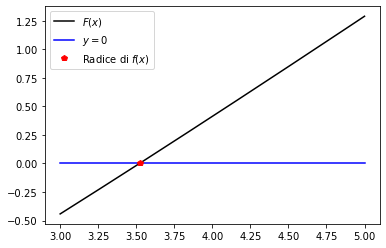

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def fx(x):
    return (x-(x**(1/3))-2)

pts = np.linspace(3,5,500)  #Disegno 500 punti nell'intervallo [3,5]

plt.plot(pts,fx(pts),'-k',label='$F(x)$')
plt.plot(pts,0*pts,'b',label = '$y=0$')

#Vediamo dal grafico che, una stima molto approssimativa della radice di f è 3.52137970680457 (x_bar)
#Aggiungiamola in rosso sul grafico:

plt.plot(x_bar,0,'pr', label = 'Radice di $f(x)$')
plt.legend()

### 2.2

#### Applicare il metodo delle bisezioni nell’intervallo [3,5] per trovare una stima dello zero $ \bar{x} $ di $f(x) = x-x^{1/3}-2$. 


Utilizzo un criterio misto con tolleranza assoluta e relativa

In [11]:
def bisezione(fx,a,b,tolA,tolR,it_max):
    
    f_a = fx(a)
    f_b = fx(b)
    
    #Controllo se il teorema di Bolzano è valido nell'intervallo [a,b] selezionato.
    #Altrimenti, non è garantita la presenza dello zero di funzione
    if(f_a*f_b>0):
        print('Il teorema di Bolzano non è applicabile\n')
        return 
       
    c = (a+b)/2
    
    #Creo una lista dove memorizzare i valori della successione, prodotti dal metodo.
    c_n = [c]
    
    n_it = 1 #Contatore per il numero di iterazioni
    
    min_it = np.ceil(np.log2((b-a)/(2*tolA))) #Calcolo una stima delle iterate minime
    
    print('Numero minimo di iterazioni',min_it)
    
    """
    #Metodo con criterio classico
    
    while((abs(fx(c))>tolA) & (n_it<it_max)):
        n_it=n_it+1
        if(fx(c)*f_a<0):
            b=c
        else:
            a=c
            f_a=fx(a)
        c=(a+b)/2
        c_n.append(c) #Inserisce il nuovo valore c nella lista
        
    return(n_it,c,c_n)
    """


    crit_mist=abs((fx(c)/(1+((tolR/tolA)*c)))) #Criterio misto di arresto
    
    while((crit_mist>tolA) & (n_it<it_max)):
        n_it=n_it+1
        if(f_a*fx(c)<0):
            b=c
        else:
            a=c
            f_a=fx(a)
            
        c=(a+b)/2
        c_n.append(c) #Inserisce il nuovo valore c nella lista
        
        crit_mist=abs((fx(c)/(1+((tolR/tolA)*c))))
        
    return(n_it,c,c_n)


In [12]:
a=3
b=5

(n_it,radice,c_n) = bisezione(fx,a,b,tolA=1e-6,tolR=1e-6,it_max=30)

err_rel = (abs((radice-x_bar[0]))/abs(x_bar[0]))

print('\n Numero di iterazioni impiegate ', n_it)
print('\n Radice trovata con il metodo delle bisezioni ', radice)
print('\n Valore di f nell approssimazione ', fx(radice))

print('\n\n Radice trovata con sympy ', x_bar[0])
print('\n Valore di f nella radice trovata con sympy ', fx(x_bar[0]))

print('\n\n Errore relativo ', err_rel)


Numero minimo di iterazioni 20.0

 Numero di iterazioni impiegate  17

 Radice trovata con il metodo delle bisezioni  3.5213775634765625

 Valore di f nell approssimazione  -1.8346595602736215e-06


 Radice trovata con sympy  3.52137970680457

 Valore di f nella radice trovata con sympy  -2.22044604925031e-16


 Errore relativo  6.08661429130698e-7


Confrontando con il metodo di Python nativo avremo:

In [13]:
import scipy.optimize

rad_f,r = scipy.optimize.bisect(fx,a,b,xtol=1e-6,maxiter=30, full_output=True)
err_rel = (abs((rad_f-x_bar[0]))/abs(x_bar[0]))

print(r)
print("\n valore di f nell'approssimazione ", fx(rad_f))

print('\n\n Radice trovata con sympy ', x_bar[0])
print('\n Radice trovata con il metodo delle bisezioni di numpy ', rad_f)
print('\n Errore relativo ', err_rel)


      converged: True
           flag: 'converged'
 function_calls: 23
     iterations: 21
           root: 3.5213804244995117

 valore di f nell'approssimazione  6.143371185096669e-07


 Radice trovata con sympy  3.52137970680457

 Radice trovata con il metodo delle bisezioni di numpy  3.5213804244995117

 Errore relativo  2.03810723102766e-7


##### Visualizzo l'andamento dell'errore, cioè come il metodo di bisezione, si avvicina a $\bar{x}$ con l'aumentare delle iterazioni.
##### Quindi nel grafico è rappresentato l'errore (avvicinamento a $\bar{x}$) con l'aumentare delle iterate.
### Come si evince dal grafico, l'ordine di convergenza è lineare.

[5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05]


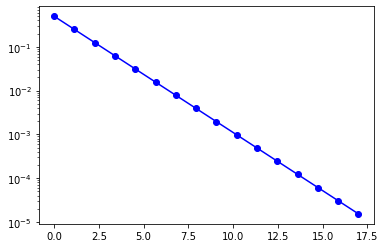

In [14]:
lista_errori = np.array(c_n)
fine = len(lista_errori)

e_approx = abs(lista_errori[1:fine] - lista_errori[0:fine-1])

print(e_approx)

plt.semilogy(np.linspace(0,n_it,len(e_approx)), e_approx, '-ob')


### 2.3

Determinare quale tra le seguenti funzioni iteratrici puo essere scelta per generare
un metodo di iterazione funzionale:

1) $f(x) = x^{1/3}+2$ 

2) $f(x) = (x-2)^{3}$

3) $f(x) = 2/9(x-2)^{3/2}$

Per scegliere la funzione iteratrice migliore, faremo riferimento al teorema di convergenza locale; quindi troveremo quella funzione tale che la sua derivata prima (calcolata nel punto $\bar{x}$) sia minore di 1, per assicurare la convergenza ; supponendo di trovarsi nelle condizioni favorevoli del teorema.

In [15]:
def g1_primo(x):
    return 1/(3*x**(2/3))
    
def g2_primo(x):
    return 3*((x-2)**(2))

def g3_primo(x):
    return ((x-2)**(1/2))/3
    

In [16]:
if(abs(g1_primo(x_bar[0]))<1): 
    
    print(abs(g1_primo(x_bar[0])))
    print('Le ipotesi del teorema sono verificate')
    
else:
    print(abs(g1_primo(x_bar[0])))
    print('La g selezionata non è valida')
    

print("\n")

if(abs(g2_primo(x_bar[0]))<1): 
    
    print(abs(g2_primo(x_bar[0])))
    print('Le ipotesi del teorema sono verificate')
    
else:
    print(abs(g2_primo(x_bar[0])))
    print('La g selezionata non è valida')

print("\n")

if(abs(g3_primo(x_bar[0]))<1): 
    
    print(abs(g3_primo(x_bar[0])))
    print('Le ipotesi del teorema sono verificate')
    
else:
    print(abs(g3_primo(x_bar[0])))
    print('La g selezionata non è valida')
    


0.144013600111032
Le ipotesi del teorema sono verificate


6.94378863683025
La g selezionata non è valida


0.411147406224279
Le ipotesi del teorema sono verificate


####  Dai risultati, ci accorgiamo che scegliendo la funzione g1 acceleriamo notevolmente la convergenza, rispetto alla funzione g3. 
####  Ovviamente la funzione g2 non rispetta le condizioni del teorema, quindi non viene considerata.

In [17]:
def g1(x):
    return (x**(1/3))+2


### 2.4 
### Scegliere quindi la funzione iteratrice piu appropriata e calcolare lo zero di f(x) usando il metodo di iterazione funzionale. Motivare la scelta fatta. Scegliere come punto iniziale x0 = 3 e un criterio di arresto a piacere con tolleranza assoluta (e relativa se il criterio lo richiede) di almeno 10−6.

In [18]:
def it_funzionale(g1,x0,tol,max_it):
    
    #max_it numero massimo di iterazioni
    n_it = 0 # numero di iterazioni
    
    #Definisco una lista che conterrà le varie approssimazioni x_k
    x_k = []
    x_k.append(x0)
    
    #Definisco una lista che conterrà la stima dell'errore ad ogni iterazione
    errori = []
    errori.append(1) #errore 1 per inizializzare il metodo
    
    while((errori[-1]>tol) & (n_it<max_it)):
        
        x_k.append(g1(x_k[n_it])) #x_k+1 := g(x_k)     
        errori.append(abs(x_k[n_it]- x_k[n_it+1])) #errore che memorizzo
        
        n_it = n_it+1
        
        
    return x_k,errori,n_it-1

In [19]:
x0 = 3
x_k,err, n_it = it_funzionale(g1,x0,1e-6,100)

print('L"ultimo valore della sequenza generata vale ', x_k[-1] )

print('\n Accuratezza raggiunta ', err[-1])
print('\n Numero di iterazioni impiegate ', n_it)


err_rel = (abs((x_k[-1]-x_bar[0]))/abs(x_bar[0]))

print('\n\n Radice trovata con sympy ', x_bar[0])
print('\n Radice trovata con il metodo delle iterazioni funzionali ', x_k[-1])
print('\n Errore relativo ', err_rel)


L"ultimo valore della sequenza generata vale  3.5213796042392627

 Accuratezza raggiunta  6.096264462129852e-07

 Numero di iterazioni impiegate  7


 Radice trovata con sympy  3.52137970680457

 Radice trovata con il metodo delle iterazioni funzionali  3.5213796042392627

 Errore relativo  2.91264541837326e-8


##### Plotto un grafico che rappresenta il rapporto tra L'errore e i vari x_k trovati in scala logaritmica

[3, 3.4422495703074083, 3.5098974493323554, 3.5197243049916356, 3.5211412690627313, 3.521345367751903, 3.521374761497894, 3.5213789946128164, 3.5213796042392627]


Text(0.5, 1.0, "Andamento dell'errore")

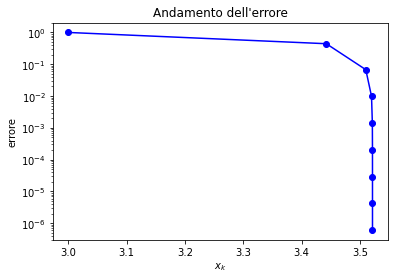

In [20]:
plt.semilogy(x_k,err,'-ob')
print(x_k)
plt.xlabel('$x_k$')
plt.ylabel('errore')
plt.title("Andamento dell'errore")


##### Plotto un grafico che rappresenta il rapporto tra l'errore e le varie iterazioni trovati in scala logaritmica

### Dal grafico notiamo come la convergenza sia lineare

Text(0.5, 1.0, 'Comportamento errore')

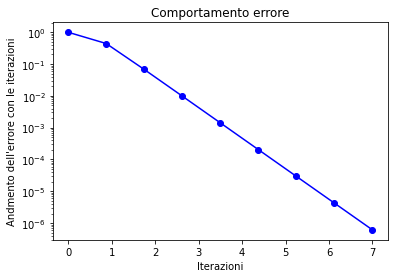

In [21]:
#Andamento degli errori con le iterazioni
plt.semilogy(np.linspace(0,n_it,len(err)),err,'-ob')
plt.xlabel('Iterazioni')
plt.ylabel("Andmento dell'errore con le iterazioni")
plt.title('Comportamento errore')

####
La convergenza è lineare, perchè $ g1'( \bar{x} ) \neq 0 $.

Quindi l'ordine di convergenza è 1.


Ricordiamo:


$g1(x) = x^{1/3}+2$ 


$g1'(x) = 1/(3*x^{2/3})$ 


In [22]:
ultimopunto = x_k[-1]
punto_fisso = g1(x_k[-1])
err_puntofisso = abs(ultimopunto-punto_fisso)/abs(ultimopunto)

print("\nUltimo punto trovato dalla funzione di iterazione: ", ultimopunto)
print("\nValore che assume la funzione nell'ultimo punto trovato: ", punto_fisso)
print("\nCon un errore relativo di: ", err_puntofisso)

print("Questo ci fa capire che l'ultimo valore trovato è proprio un punto fisso di g (con un errore)")
print("\n\ng primo calcolato nel punto x_bar: ", g1_primo(x_bar[0]));



Ultimo punto trovato dalla funzione di iterazione:  3.5213796042392627

Valore che assume la funzione nell'ultimo punto trovato:  3.5213796920337685

Con un errore relativo di:  2.4931849375676595e-08
Questo ci fa capire che l'ultimo valore trovato è proprio un punto fisso di g (con un errore)


g primo calcolato nel punto x_bar:  0.144013600111032
